# BIA-652 Lab 1 Assignment. Intro to Pandas

Note: Please **DO NOT** share your answers with anyone, including uploading to Github, Course Hero, etc. 

### Your Name: 

Name: Dishant Naik
CWID: 10454341

In [1]:
import numpy as np #numerical computation
import pandas as pd #processing dataframes
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Use the `RegularSeasonCompactResults` data to answer the following questions:  

In [2]:
# Download example data set
import urllib.request
from zipfile import ZipFile

urllib.request.urlretrieve("http://fengmai.net/download/data/bia652/pandas_data.zip", 
                           "pandas_data.zip")
ZipFile("pandas_data.zip").extractall()
df = pd.read_csv('data/RegularSeasonCompactResults.csv')

In [3]:
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


__Q1: Create a new column `total_score` as the sum of Wscore and Lscore.__ 

In [4]:
df['total_sum'] = df.Wscore + df.Lscore
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,total_sum
0,1985,20,1228,81,1328,64,N,0,145
1,1985,25,1106,77,1354,70,H,0,147
2,1985,25,1112,63,1223,56,H,0,119
3,1985,25,1165,70,1432,54,H,0,124
4,1985,25,1192,86,1447,74,H,0,160


__Q2: What is the min, max, average, and median of the total_score?__ 

In [5]:
df.total_sum.describe()

count    145289.000000
mean        141.097330
std          21.601779
min          62.000000
25%         126.000000
50%         140.000000
75%         155.000000
max         331.000000
Name: total_sum, dtype: float64

In [6]:
df.total_sum.median()

140.0

Min = 62.000000
Max = 331.000000
Average = 141.097330
Median = 140.0

__Q3: Find the average total score for each year (season).__ 

In [7]:
avg_total_score = df.groupby(['Season'])[['total_sum']].mean()
avg_total_score.reset_index(inplace=True)
avg_total_score.head()

#NOTE: Here total_sum represents Average total score

,Season,total_sum
0,1985,138.583356
1,1986,138.447528
2,1987,144.764496
3,1988,147.470796
4,1989,151.259351


__Q4: Plot a time series plot of average total score by year (season)__ 

Hint: search Google for: how to plot a pandas series or [read the user guide](https://pandas.pydata.org/docs/user_guide/visualization.html)


[Text(0, 0.5, 'Avg_total_score'), Text(0.5, 0, 'Season')]

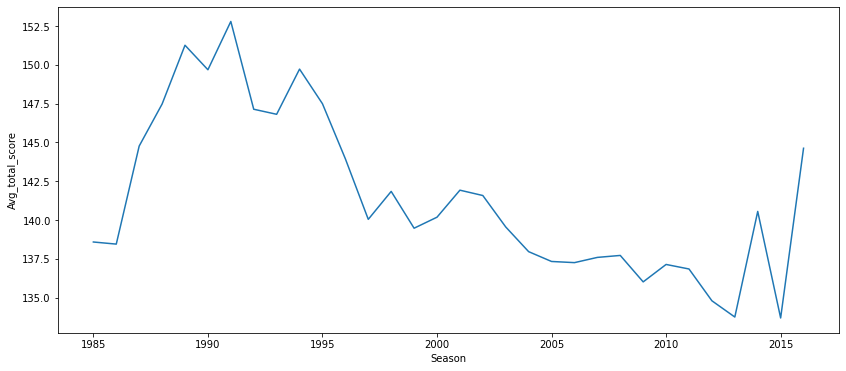

In [8]:
plt.figure(figsize=(14, 6))
x = sns.lineplot(x = avg_total_score.Season, y = avg_total_score.total_sum,)
x.set(xlabel="Season", ylabel = "Avg_total_score")

__Q5: Which year has the highest percentage of blowout games, which is defined as a winning margin of at least 30 points?__ 



In [9]:
# New column blowout wihich contains 0 if NO blowout and 1 if blowout
df['blowout'] = df.apply(lambda x:1 if (x['Wscore'] - x['Lscore'] >= 30) else 0, axis=1)
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,total_sum,blowout
0,1985,20,1228,81,1328,64,N,0,145,0
1,1985,25,1106,77,1354,70,H,0,147,0
2,1985,25,1112,63,1223,56,H,0,119,0
3,1985,25,1165,70,1432,54,H,0,124,0
4,1985,25,1192,86,1447,74,H,0,160,0


In [10]:
# Adding all the 1s in blowout column using group by season to find total number of blowout per year
tmp1_df = df.groupby(['Season'])[['blowout']].sum()
tmp1_df.reset_index(inplace=True)
tmp1_df.head()

,Season,blowout
0,1985,166
1,1986,187
2,1987,185
3,1988,242
4,1989,260


In [11]:
# creating tmp col with 1 in all the records to aid process of counting total match
# Adding up all the 1s in tmp by season to determin total numbers of matches played in each year 
df['tmp'] = 1
tmp2_df = df.groupby(['Season'])[['tmp']].sum()
tmp2_df.reset_index(inplace=True)
tmp2_df.head()

# Here tmp series describes total number of match played in the season

,Season,tmp
0,1985,3737
1,1986,3783
2,1987,3915
3,1988,3955
4,1989,4037


In [12]:
# Joining blowout and tmp(which is total numbers of matches) to calculate blowout percentage
tmp3_df = pd.merge(tmp1_df,tmp2_df,how='inner')
tmp3_df.head()

,Season,blowout,tmp
0,1985,166,3737
1,1986,187,3783
2,1987,185,3915
3,1988,242,3955
4,1989,260,4037


In [13]:
tmp3_df['blowout_per'] = (tmp3_df.blowout / tmp3_df.tmp) * 100
tmp3_df.head()

,Season,blowout,tmp,blowout_per
0,1985,166,3737,4.442066
1,1986,187,3783,4.943167
2,1987,185,3915,4.725415
3,1988,242,3955,6.118837
4,1989,260,4037,6.440426


In [14]:
max = tmp3_df.blowout_per.max()
tmp3_df.loc[tmp3_df['blowout_per'] == max]

,Season,blowout,tmp,blowout_per
6,1991,291,4123,7.057967


**Q6: For each team and season combination,   
a) find the average number of points scored by the team per game in each season;  
b) plot the average points scored by team 1461 by year.**

Hint: This requires you to consider both the case when the team won (Wscore) and when the team lost (Lscore).  
Your answer for each team-year combination should be between Wscore_when_winning and Lscore_when_losing in the last dataframe of the tutorial. 

In [15]:
#Num of points scored by each team in a year while winning
tmp1 = df.groupby(['Season','Wteam']).Wscore.sum()
tmp1 = tmp1.reset_index()
type(tmp1)

pandas.core.frame.DataFrame

In [16]:
tmp1.head()

,Season,Wteam,Wscore
0,1985,1102,355
1,1985,1103,632
2,1985,1104,1514
3,1985,1106,751
4,1985,1108,1631


In [17]:
#Num of points scored by each team in a year while losing
tmp2 = df.groupby(['Season','Lteam']).Lscore.sum()
tmp2 = tmp2.reset_index()
tmp2.head()

,Season,Lteam,Lscore
0,1985,1102,1159
1,1985,1103,772
2,1985,1104,541
3,1985,1106,968
4,1985,1108,444


In [18]:
# mearging tmp1 and tmp2 to calculate total number of points scored by each team in a year
tmp22 = pd.merge(tmp1,tmp2,how='inner',left_on=['Season','Wteam'],right_on=['Season','Lteam'])
tmp22.head()

,Season,Wteam,Wscore,Lteam,Lscore
0,1985,1102,355,1102,1159
1,1985,1103,632,1103,772
2,1985,1104,1514,1104,541
3,1985,1106,751,1106,968
4,1985,1108,1631,1108,444


In [21]:
#Num of games played by each team in each year while winning
tmp11 = df.groupby(['Season','Wteam']).tmp.sum()
tmp11 = tmp11.reset_index()
tmp11.head()

,Season,Wteam,tmp
0,1985,1102,5
1,1985,1103,9
2,1985,1104,21
3,1985,1106,10
4,1985,1108,19


In [22]:
#Num of games played by each team in each year while losing
tmp111 = df.groupby(['Season','Lteam']).tmp.sum()
tmp111 = tmp111.reset_index()
tmp111.head()

,Season,Lteam,tmp
0,1985,1102,19
1,1985,1103,14
2,1985,1104,9
3,1985,1106,14
4,1985,1108,6


In [23]:
tmp1111 = pd.merge(tmp11,tmp111,how='inner',left_on=['Season','Wteam'],right_on=['Season','Lteam'])
tmp1111['total_games']  = tmp1111.tmp_x + tmp1111.tmp_y
tmp1111.head()

# Note tmp_x = total numbrs of games played by a team in a year while winning
# Note tmp_y = total numbrs of games played by a team in a year while Losing

,Season,Wteam,tmp_x,Lteam,tmp_y,total_games
0,1985,1102,5,1102,19,24
1,1985,1103,9,1103,14,23
2,1985,1104,21,1104,9,30
3,1985,1106,10,1106,14,24
4,1985,1108,19,1108,6,25


In [34]:
tmp_final = pd.merge(tmp22,tmp1111,how='inner',left_on=['Season','Wteam','Lteam'],right_on=['Season','Wteam','Lteam'])
tmp_final.head()

,Season,Wteam,Wscore,Lteam,Lscore,total_score,tmp_x,tmp_y,total_games
0,1985,1102,355,1102,1159,1514,5,19,24
1,1985,1103,632,1103,772,1404,9,14,23
2,1985,1104,1514,1104,541,2055,21,9,30
3,1985,1106,751,1106,968,1719,10,14,24
4,1985,1108,1631,1108,444,2075,19,6,25


In [38]:
tmp_final.rename(columns={'tmp_x':'No_games_winning','tmp_y':'No_games_losing'},inplace=True)
tmp_final.head()

,Season,Wteam,Wscore,Lteam,Lscore,total_score,No_games_winning,No_games_losing,total_games
0,1985,1102,355,1102,1159,1514,5,19,24
1,1985,1103,632,1103,772,1404,9,14,23
2,1985,1104,1514,1104,541,2055,21,9,30
3,1985,1106,751,1106,968,1719,10,14,24
4,1985,1108,1631,1108,444,2075,19,6,25


In [47]:
tmp_final['weights'] = (tmp_final.Wscore * tmp_final.No_games_winning) + (tmp_final.Lscore * tmp_final.No_games_losing)

In [49]:
tmp_final['Avg_score'] = tmp_final.weights / tmp_final.total_games

In [50]:
tmp_final.head()

,Season,Wteam,Wscore,Lteam,Lscore,total_score,No_games_winning,No_games_losing,total_games,weights,Avg_score
0,1985,1102,355,1102,1159,1514,5,19,24,23796,991.500000
1,1985,1103,632,1103,772,1404,9,14,23,16496,717.217391
2,1985,1104,1514,1104,541,2055,21,9,30,36663,1222.100000
3,1985,1106,751,1106,968,1719,10,14,24,21062,877.583333
4,1985,1108,1631,1108,444,2075,19,6,25,33653,1346.120000


In [51]:
#plot the average points scored by team 1461 by year 5(b)
sub_final = tmp_final.loc[tmp_final['Wteam'] == 1461]
sub_final.head()

,Season,Wteam,Wscore,Lteam,Lscore,total_score,No_games_winning,No_games_losing,total_games,weights,Avg_score
278,1985,1461,823,1461,830,1653,12,14,26,21496,826.769231
560,1986,1461,1290,1461,699,1989,18,11,29,30909,1065.827586
849,1987,1461,1507,1461,608,2115,21,9,30,37119,1237.300000
1139,1988,1461,1957,1461,319,2276,25,5,30,50520,1684.000000
1432,1989,1461,1123,1461,1134,2257,14,17,31,35000,1129.032258


[Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016')]

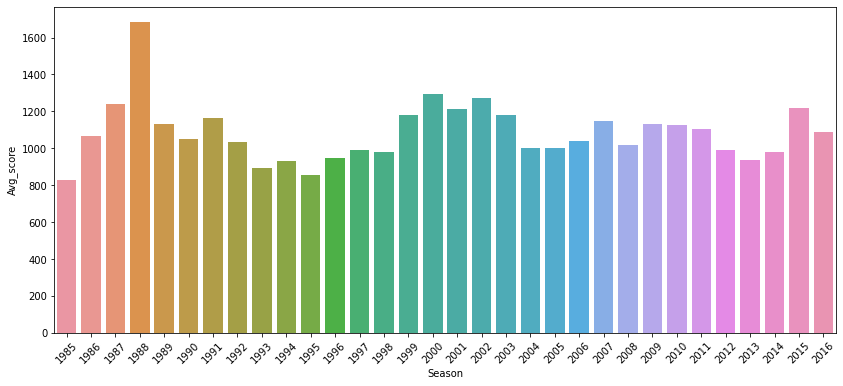

In [53]:
plt.figure(figsize=(14, 6))
x = sns.barplot(x = sub_final.Season, y = sub_final.Avg_score)
x.set(xlabel="Season", ylabel = "Avg_score")
x.set_xticklabels(x.get_xticklabels(),rotation=45)